# Интернет-магазин «В один клик»

## 1. Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

**Цель проекта:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Задача проекта:** 
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Нужно собрать данные по клиентам по следующим группам:
   * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения. 

## 2. Описание данных
1. `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
2. `market_money.csv` - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом
3. `market_time.csv` - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
4. `money.csv` - данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

### Признаки market_file.csv:

* `id` — номер покупателя в корпоративной базе данных.
* `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
* `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
* `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
* `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

### Признаки market_money.csv:
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* `Выручка` — сумма выручки за период.

### Признаки market_time.csv:
* `id` — номер покупателя в корпоративной базе данных.
* `Период` — название периода, во время которого зафиксировано общее время.
* `минут` — значение времени, проведённого на сайте, в минутах.

### Признаки money.csv
* `id` — номер покупателя в корпоративной базе данных.
* `Прибыль` — значение прибыли.

## 3. Загрузка и общая информация о данных

In [ ]:
!pip install scikit-learn --upgrade
!pip install shap -q
!pip -q install phik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from IPython.display import display

In [3]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler,  LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
import phik
import shap

In [237]:
# Загружаем данные
try:
    market_file = pd.read_csv('/datasets/market_file.csv', sep = ',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep = ',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep = ',')
    money = pd.read_csv('/datasets/money.csv', sep = ';', decimal=',')
except:
    market_file = pd.read_csv('market_file.csv', sep=',')
    market_money = pd.read_csv('market_money.csv', sep=',')
    market_time = pd.read_csv('market_time.csv', sep=',')
    money = pd.read_csv('money.csv', sep=';', decimal=',')

In [10]:
# Функция для общей информации о данных
def information(dataset):
    display(dataset.head())
    display(dataset.tail())
    print(dataset.info())
    print('Количество пропусков:\n', dataset.isna().sum())
    print('Количество явных дубликатов:', dataset.duplicated().sum())
    display(dataset.describe().T)

In [13]:
information(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7
1299,216647,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


**При изучении общей информации о данных `market_file`можно выделить важные моменты:**
* Пропущенные значения отсутствуют
* Количество явных дубликатов: 0
* Тип данных не соответствует для столбцов: `Маркет_актив_6_мес`, `Акционные_покупки`
* Необходимо привести названия столбцов к общему виду

In [16]:
information(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,Выручка
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0
3899,216647,текущий_месяц,4448.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None
Количество пропусков:
 id         0
Период     0
Выручка    0
dtype: int64
Количество явных дубликатов: 0


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2


**При изучении общей информации о данных `market_money`можно выделить важные моменты:**
* Пропущенные значения отсутствуют
* Количество явных дубликатов: 0
* Тип данных не соответствует для столбца: `Выручка`
* Необходимо привести названия столбцов к общему виду

In [19]:
information(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Период,минут
2595,216645,текущий_месяц,18
2596,216646,предыдцщий_месяц,18
2597,216646,текущий_месяц,7
2598,216647,текущий_месяц,10
2599,216647,предыдцщий_месяц,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None
Количество пропусков:
 id        0
Период    0
минут     0
dtype: int64
Количество явных дубликатов: 0


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


**При изучении общей информации о данных `market_time`можно выделить важные моменты:**
* Пропущенные значения отсутствуют
* Количество явных дубликатов: 0
* Нужно проверить неявные дубликаты **предыдцщий_месяц**
* Необходимо привести названия столбцов к общему виду

## Подготовка данных

In [24]:
# Меняем тип данных в таблице market_file
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype('float')
market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype('float')
# Меняем тип данных в таблице market_money
market_money['Выручка'] = market_money['Выручка'].astype('float')

In [29]:
print(market_file.info())
print(market_money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [31]:
# Неявные дубликаты
print ('Уникальные значение в таблице market_file:')
for i in ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']:
    print (market_file[i].unique())

print('Уникальные значение в таблице market_time:', market_time['Период'].unique())
print('Уникальные значение в таблице market_money:', market_money['Период'].unique())

Уникальные значение в таблице market_file:
['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значение в таблице market_time: ['текущий_месяц' 'предыдцщий_месяц']
Уникальные значение в таблице market_money: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [33]:
# Исправление значений 
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [35]:
print ('Уникальные значение в таблице market_file:')
for i in ['Покупательская активность', 'Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']:
    print (market_file[i].unique())

print('Уникальные значение в таблице market_time:', market_time['Период'].unique())
print('Уникальные значение в таблице market_money:', market_money['Период'].unique())

Уникальные значение в таблице market_file:
['Снизилась' 'Прежний уровень']
['премиум' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значение в таблице market_time: ['текущий_месяц' 'предыдущий_месяц']
Уникальные значение в таблице market_money: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [37]:
# Приведем названия столбцов к общему виду
market_file = market_file.rename(columns = {
    'Покупательская активность':'Покупательская_активность',
    'Тип сервиса': 'Тип_сервиса',
    'Разрешить сообщать':'Разрешить_сообщать',
    })
market_file.columns = market_file.columns.str.lower()
market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [39]:
market_money.columns = market_money.columns.str.lower()
market_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [41]:
market_time.columns = market_time.columns.str.lower()
market_time.columns

Index(['id', 'период', 'минут'], dtype='object')

**Вывод по предобработке данных:**
* Избавились от неявных дубликатов, заменив 'стандартт' на 'стандарт', 'предыдцщий_месяц' на 'предыдущий_месяц'
* Изменили тип даннхы на подходящий
* Проверили наличие пропущенных значений
* Привели названия столбцов к общему виду

## Исследовательский анализ данных

### Количественные признаки 

In [50]:
# Списки столбцов категориальные
cat_col_market = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать','популярная_категория']
# Списки столбцов количественные
num_col_market = ['маркет_актив_6_мес','длительность', 'акционные_покупки']
# Дискретные признаки
market_di = ['маркет_актив_тек_мес','средний_просмотр_категорий_за_визит',
             'неоплаченные_продукты_штук_квартал','ошибка_сервиса', 'страниц_за_визит']

In [52]:
# Функции для построения гистограммы, диаграммы размаха для столбцов с количественными признаками
def hist_box(data, column):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    sns.histplot(data[column], color='hotpink')
    plt.subplot(1, 2, 2)
    plt.xlabel(f'{column}')
    plt.title(f'Диаграмма размаха {column}')
    sns.boxplot(x=data[column], color='teal')

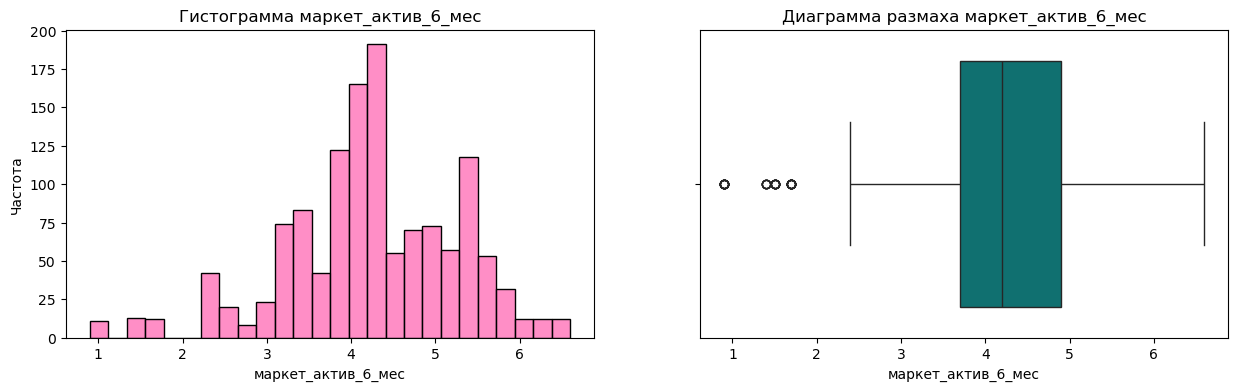

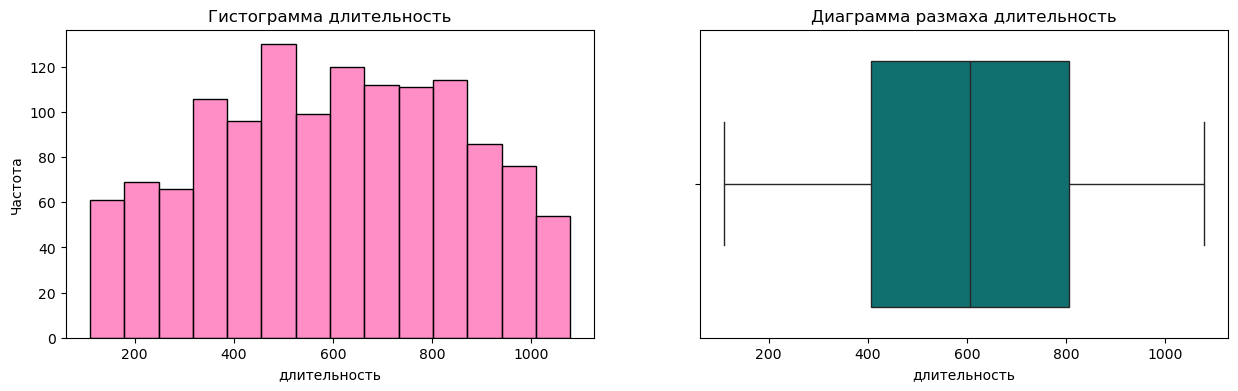

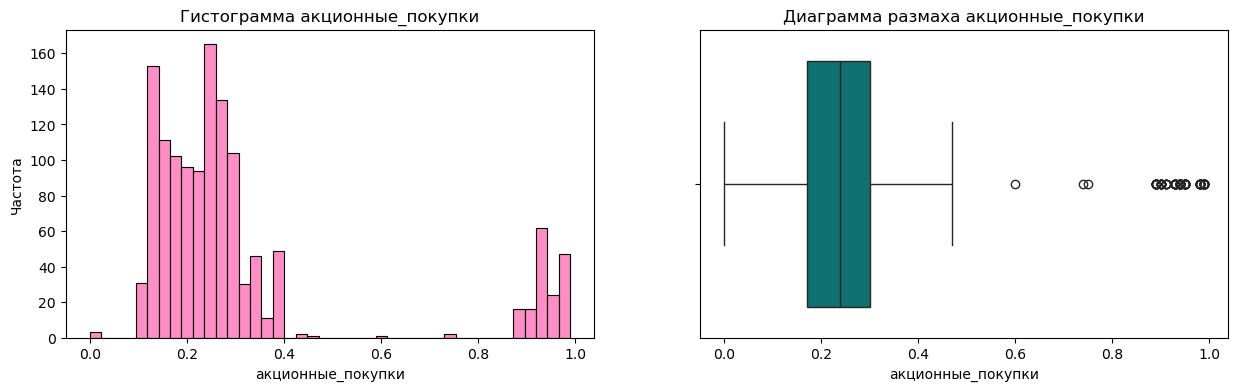

In [55]:
for name in num_col_market:
    hist_box(market_file, name)

In [57]:
# Функция для построения гистограммы, диаграммы размаха для столбцов с дискретными признаками
def hist_box_di(data, column):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма{column}')
    sns.countplot(data = data, x = data[column], color='hotpink')

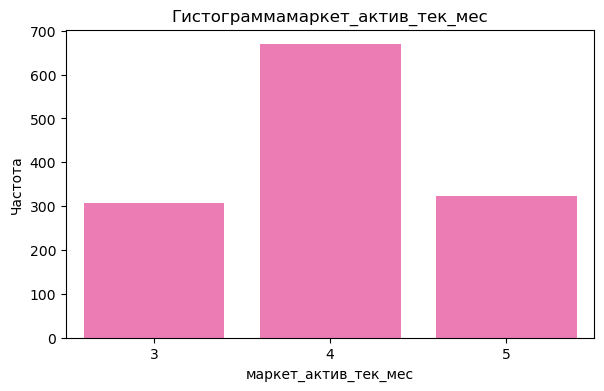

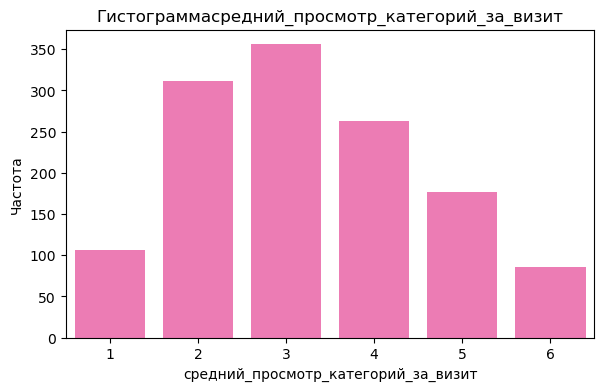

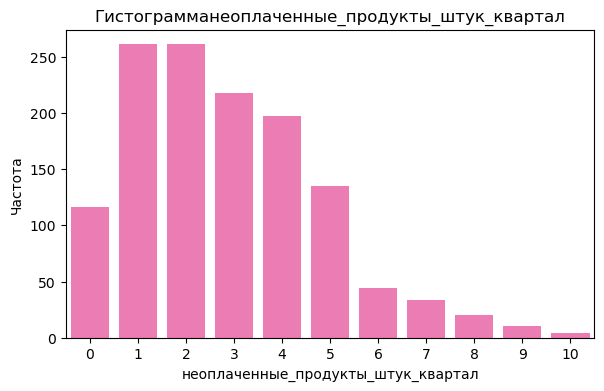

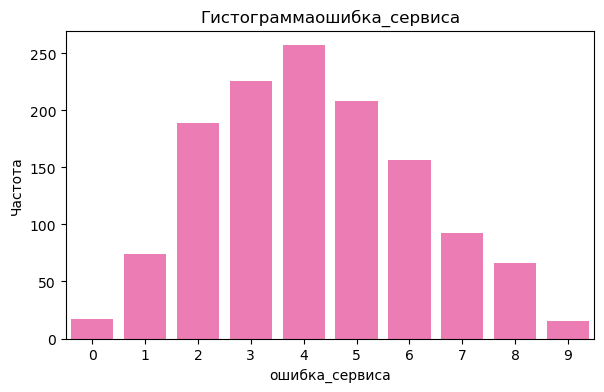

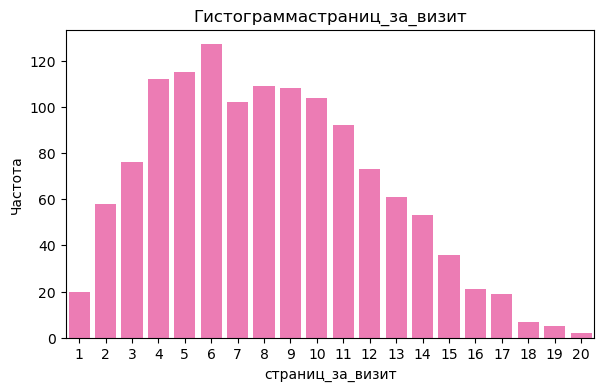

In [59]:
for name in market_di:
    hist_box_di(market_file, name)

**Вывод:**
   * `Маркет_актив_6_мес` распределен нормально, однако имеются выбросы в минимальных значениях. 
   * `Маркет_актив_тек_мес` имеет только три значения и большн напоминает категориальный признак
   * `Длительность` распределено нормально.
   * `Акционные_покупки` имеет бимодальное распределение.
   * `Средний_просмотр_категорий_за_визит` распределено нормально, можно тоже изменить на категориальный так как имеет только 6 значений.
   * `Неоплаченные_продукты_штук_квартал` категориальный признак, есть выбросы. 
   * `Ошибка_сервиса` распределено нормально, признаки категориальные
   * `Страниц_за_визит` распредлено нормально, но скошенно влево

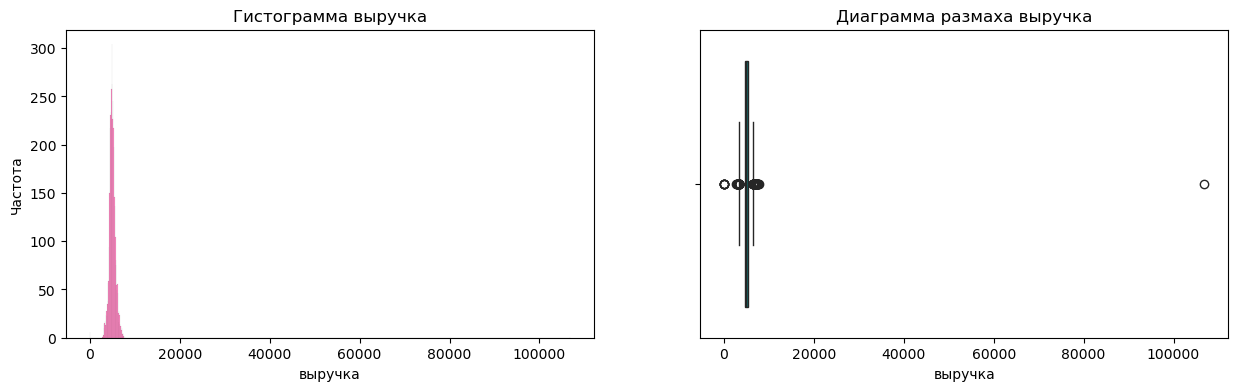

In [62]:
# Распределение количественных признаков датасета market_money
hist_box(market_money, 'выручка')

**Присутствует большой выброс в данных. Необходимо удалить со всех таблиц id покупателя с выручкой в 100 000 и более**

In [65]:
data = [market_file, market_time, market_money, money]

In [67]:
list_id = market_money.query('выручка > 20000')['id'].tolist()

In [69]:
market_money = market_money[~market_money['id'].isin(list_id)]
market_file = market_file[~market_file['id'].isin(list_id)]
market_time = market_time[~market_time['id'].isin(list_id)]

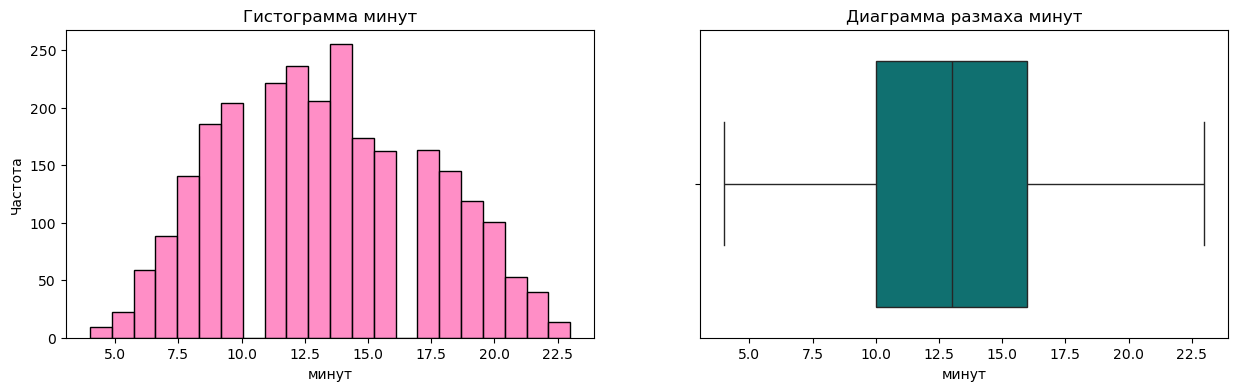

In [71]:
# Распределение количественных признаков market_time
hist_box(market_time, 'минут')

Выбросов нет. Нормальное распределение.

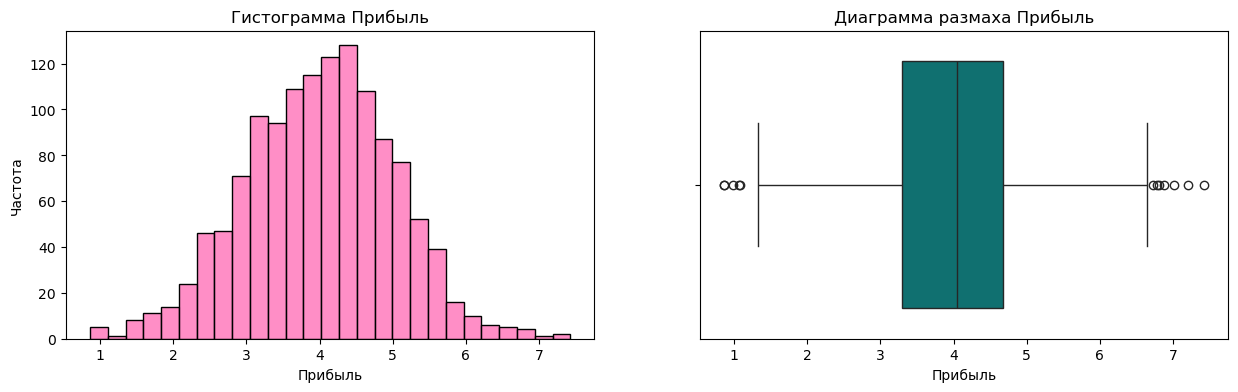

In [75]:
# Распределений количественных признаков money
hist_box(money, 'Прибыль')

Выбросы есть, но не критичные. Распределение нормальное.

### Категориальные признаки 

In [79]:
def pie_graph(dataset, column, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)[name].count(),
            startangle=90,
            labeldistance=1.1, 
            wedgeprops={'linewidth':3, 'edgecolor':'white'}, 
            autopct='%1.1f%%',
            labels=dataset.groupby(column)[name].count().index, 
            colors=sns.color_palette('Pastel1'))

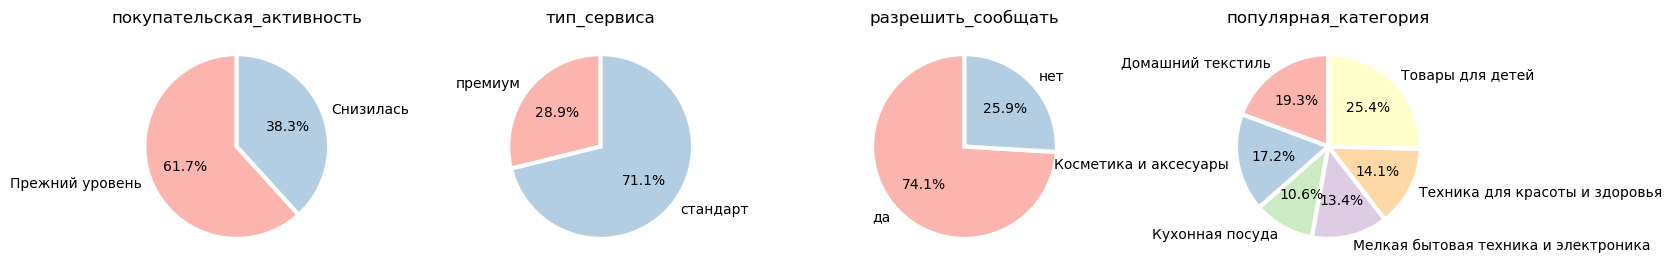

In [81]:
i = 1
plt.figure(figsize=(18,3))
for name in cat_col_market:
    pie_graph(market_file, name, 'id', len(cat_col_market), i)
    i += 1

**Вывод:**
   * `Покупательская активность` на 61 процент остаётся на прежнем уровне, преобладая на снижающейся 
   * `Тип сервиса` в 71 проценте имеет стандартный тип.
   * `Разрешить сообщать` в 74 процентах заказчик разрешает сообщать.
   * `Популярные категории` самой популярной являются Товары для детей, далее Домашний текстиль и Косметика и аксесуары.

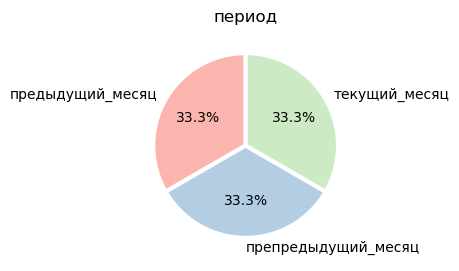

In [84]:
# market_money
i = 1
plt.figure(figsize=(18,3))
pie_graph(market_money, 'период', 'id', 1, i)

**Вывод:** Период по данным распределен равномерно в таблице market_money

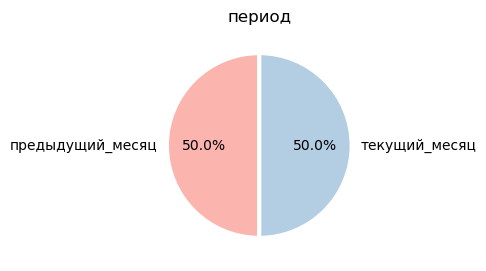

In [87]:
# market_time
i = 1
plt.figure(figsize=(18,3))
pie_graph(market_time, 'период', 'id', 1, i)

**Вывод:** Период по данным распределен равномерно в таблице market_time

### Клиенты с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [91]:
# Пользователи, не принесшие выручку в течение последних 3 месяцов
list_id = market_money.query('выручка == 0')['id']

In [93]:
print(list_id)

0     215348
2     215348
28    215357
29    215357
34    215359
35    215359
Name: id, dtype: int64


In [95]:
# Удаляем этих клиентов из всех датасетов
market_money = market_money[~market_money['id'].isin(list_id)]
market_file = market_file[~market_file['id'].isin(list_id)]
market_time = market_time[~market_time['id'].isin(list_id)]

## Объединение таблиц

### Объедините таблицы market_file.csv, market_money.csv, market_time.csv.

In [100]:
market_money2 = pd.pivot_table(market_money, values='выручка', index='id',
                       columns= 'период')
market_money2 = market_money2.reset_index()

market_money2 = market_money2.rename(columns={'предыдущий_месяц':'предыдущий_месяц_выручка', 
                                              'препредыдущий_месяц':'препредыдущий_месяц_выручка', 
                                              'текущий_месяц':'текущий_месяц_выручка'})
display(market_money2.head())
print('market_money2', market_money2.shape[0])

период,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


market_money2 1296


In [102]:
market_time2 = pd.pivot_table(market_time, index='id', values='минут',
                       columns= 'период')
market_time2 = market_time2.reset_index()
market_time2 = market_time2.rename(columns={'предыдущий_месяц':'предыдущий_месяц_минут',
                                            'текущий_месяц':'текущий_месяц_минут'})
display(market_time2.head())
print('market_time2', market_time2.shape[0])

период,id,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,12.0,10.0
1,215350,8.0,13.0
2,215351,11.0,13.0
3,215352,8.0,11.0
4,215353,10.0,10.0


market_time2 1296


In [104]:
# Объединение таблиц
market = pd.merge(market_file, market_money2, on = 'id', how='outer')
market = pd.merge(market, market_time2, on = 'id', how='outer')
display(market.head())
print('market_time2', market.shape[0])

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12.0,10.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8.0,13.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11.0,13.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8.0,11.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10.0,10.0


market_time2 1296


## Корреляционный анализ

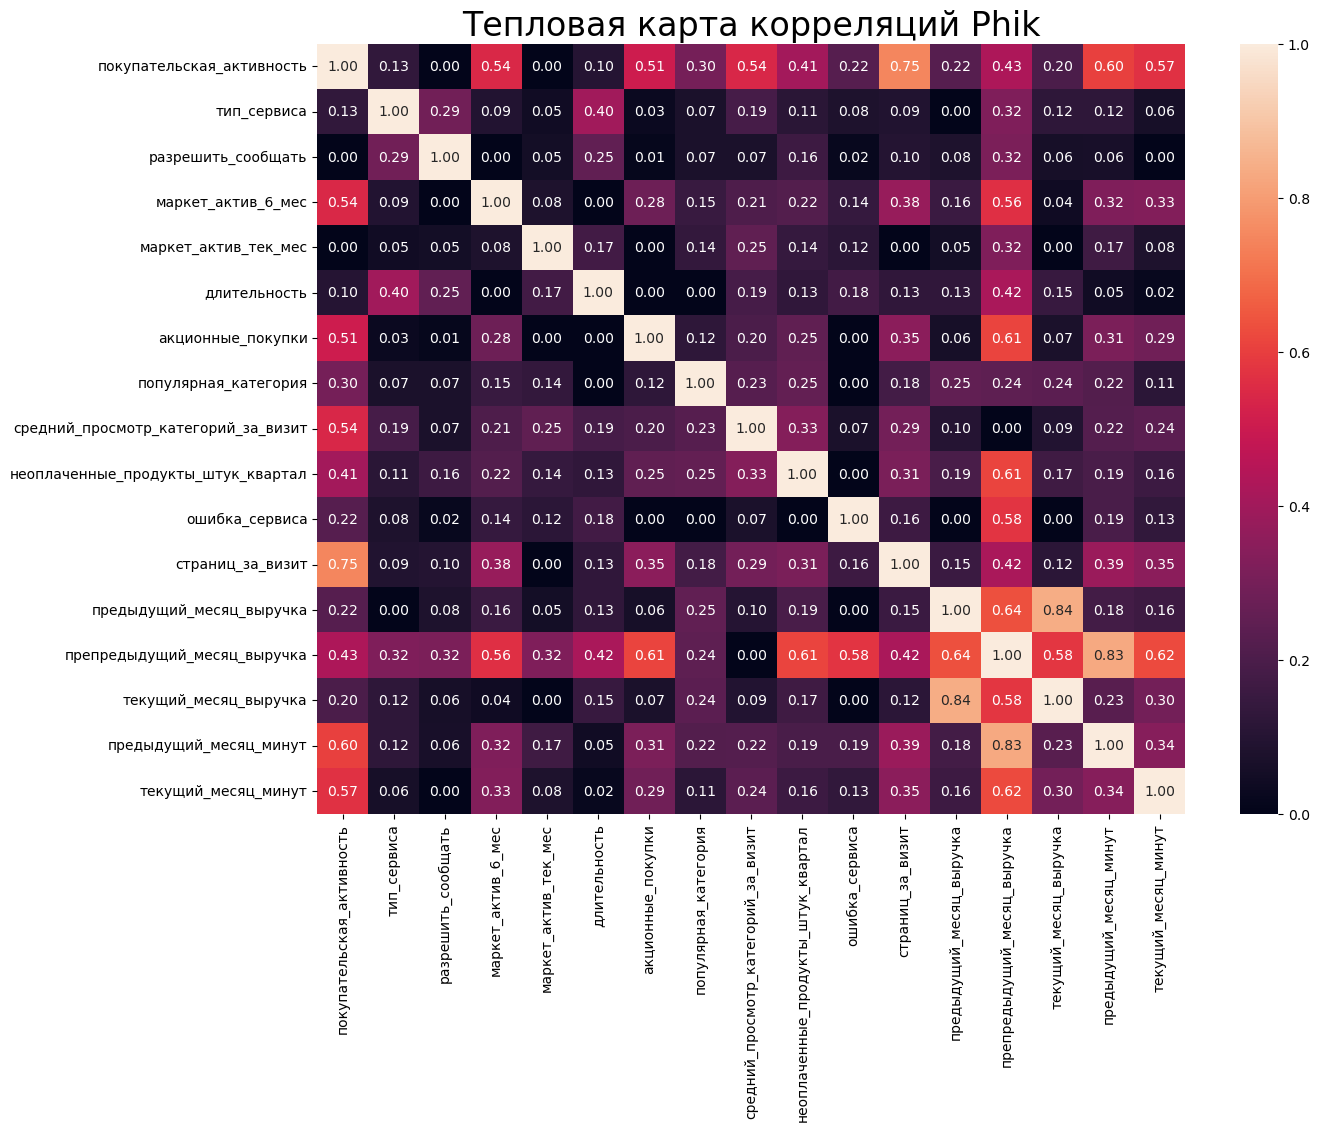

In [108]:
market = market.drop(['id'], axis =1)
plt.figure(figsize=(14,10))
sns.heatmap(market.phik_matrix(interval_cols=['маркет_актив_6_мес', 'длительность', 'акционные_покупки',
                                                'выручка_препредыдущий_месяц', 'предыдущий_месяц_выручка',
                                                'текущий_месяц_выручка']), annot = True, fmt = '.2f')
plt.title('Тепловая карта корреляций Phik', fontsize=24)
plt.show()

**Вывод:** 
* Наблюдается сильная зависимость между выручкой предпредыдущего месяца и предыдущего. 
* Наблюдается сильная зависимость так же между предыдущий_месяц_минут и препредыдущий_месяц_выручка
* Так же умеренная положительная корреляция сколько минут проводит человек на сайте и сколько страниц было посещено. Чем больше пользователь проводит времени на сайте, тем больше страниц может отсмотреть 


**Наблюдается мультиколлинеарность, чтобы избавиться от нее следует объединить столбцы 'текущий месяц выручка' и ' предыдущий месяц' в столбец за 2 месяца**

In [112]:
market['выручка_2_мес'] = market['препредыдущий_месяц_выручка'] + market['предыдущий_месяц_выручка']
market = market.drop(columns = ['препредыдущий_месяц_выручка','предыдущий_месяц_выручка'], axis = 1)

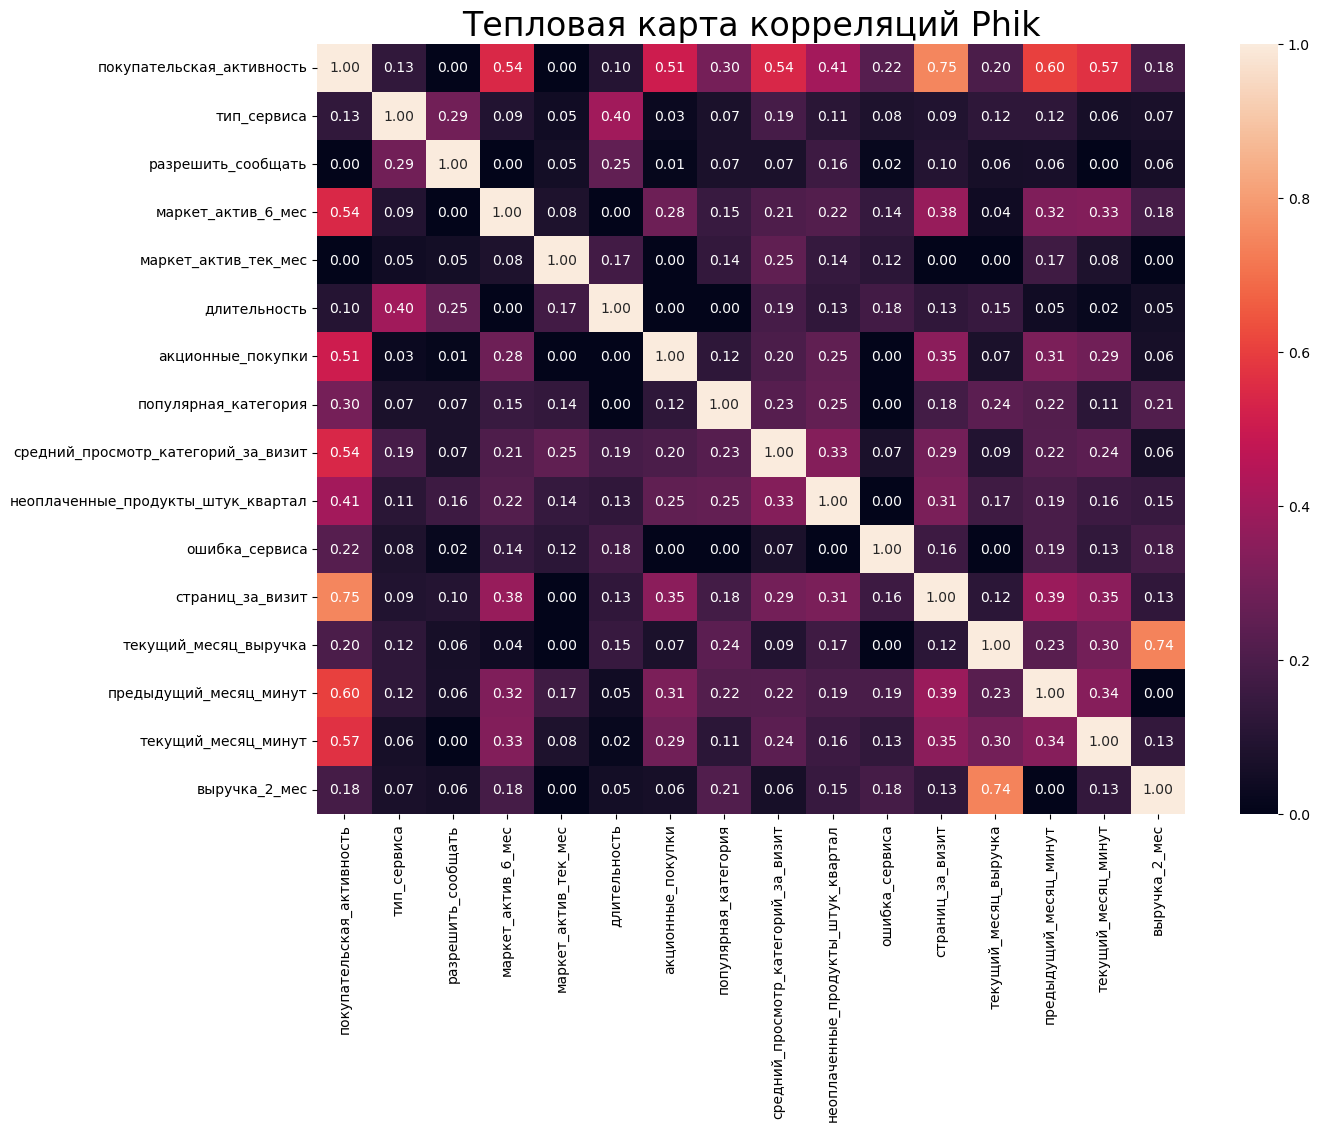

In [115]:
phik_matrix = market.phik_matrix(interval_cols=['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 
                                                   'текущий_месяц_выручка', 'выручка_2_мес'])

plt.figure(figsize=(14, 10))
sns.heatmap(phik_matrix, annot=True, fmt='.2f')
plt.title('Тепловая карта корреляций Phik', fontsize=24)
plt.show()

**Вывод:**
* Обнаружена высокая корреляцию между выручкой в предпредыдущем месяце и в предыдущем. 
* И высокая корреляция между препредыдущем месяцев выручки и текщим месяцем минут.
* Избавились от  мультиколлинеарности  с помощью объединения двух столбцов в один.

## Использование пайплайнов

### Подготовка пайпланов для моделей

In [121]:
# Разделение выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    market.drop(['покупательская_активность'], axis=1),
    market['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market['покупательская_активность'])

In [123]:
# Кодирование целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [126]:
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
num_columns = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки','текущий_месяц_выручка',
               'предыдущий_месяц_минут','текущий_месяц_минут', 'выручка_2_мес', 'страниц_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'маркет_актив_тек_мес', 
               'средний_просмотр_категорий_за_визит'] 
ohe_columns = ['популярная_категория']

In [128]:
# Pipeline для кодирования категориальных признаков
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', 
         SimpleImputer(missing_values=np.nan, 
                       strategy='most_frequent')), 
        ('ohe', 
         OneHotEncoder(drop='first', 
                       handle_unknown='error', 
                       sparse_output=False))
    ]
)

In [130]:
# Pipeline для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [132]:
# Pipeline для подготовки данных
data_preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), ohe_columns),
        ('ord', OrdinalEncoder(), ord_columns),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())
        ]), num_columns)
    ],
    remainder='passthrough'
)

In [136]:
# Итоговый Pipeline: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

### Обучение моделей и выбор метрик 

In [139]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 3),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }

]

### Нахождение лучшей модели по RandomizedSearchCV

In [143]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [145]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               OrdinalEncoder(),
                                                                               ['тип_сервиса',
                                                                                'разрешить_сообщать']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['...
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__degree': range(2, 3),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [148]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'текущий_месяц_выручк

In [151]:
# Обучаем DummyClassifier на тренировочной выборке
dummy_clf = DummyClassifier(strategy='most_frequent') 
dummy_clf.fit(X_train, y_train)

# Получаем предсказания для тестовой выборки
y_dummy_pred = dummy_clf.predict(X_test)
y_dummy_prob = dummy_clf.predict_proba(X_test)[:, 1]  # Если используем 'mean', то это будет просто среднее

# Вычисляем ROC-AUC для константной модели
dummy_roc_auc = roc_auc_score(y_test, y_dummy_prob)
print(f'ROC-AUC для константной модели: {dummy_roc_auc}')

# Теперь сравниваем с  лучшей моделью
best_model = randomized_search.best_estimator_  
y_best_pred = best_model.predict(X_test)
y_best_prob = best_model.predict_proba(X_test)[:, 1]

# Вычисляем ROC-AUC для лучшей модели
best_roc_auc = roc_auc_score(y_test, y_best_prob)
print(f'ROC-AUC для лучшей модели: {best_roc_auc}')

# Сравниваем результаты
if best_roc_auc > dummy_roc_auc:
    print("Лучшая модель значительно лучше константной модели.")
else:
    print("Лучшая модель не показала значительного улучшения по сравнению с константной моделью.")

ROC-AUC для константной модели: 0.5
ROC-AUC для лучшей модели: 0.9168790195364639
Лучшая модель значительно лучше константной модели.


### Нахождение лучшей модели по GridSearchCV

In [156]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid.best_estimator_)
print ('Метрика лучшей модели:', grid.best_score_)

Лучшая модель и её параметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['популярная_категория']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'текущий_месяц_выручка'

In [158]:
# Получаем вероятности для положительного класса
y_test_prob = randomized_search.predict_proba(X_test)[:, 1]

# Вычисляем метрику ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc}')

Метрика ROC-AUC на тестовой выборке: 0.9168790195364639


**Вывод:** Лучшей моделью оказалась LogisticRegression. Метрика лучшей модели: 0.9170408121991669. В данной бизнес-задаче важнее метрика **Recall**, так как мы работаем над предотвращением негативного события класса "снизилась". Recall покажет долю объектов класса "снизилась", которые модель правильно предсказала. Если модель будет пропускать потенциальных клиентов на снижение, появляется риск потерять доход. 

**Метрика ROC-AUC** используется для оценки качества классификационных моделей, принимаяет значения от 0 до 1, где 1 означает идеальную модель, а 0 — случайную модель. Эта метрика полезна для сравнения различных моделей и выбора лучшей из н, AUC применяется в задачах бинарной классификации, где модель должна определить, к какой из двух категорий относится объект. Это может быть задача определения наличия покупательской активностДля данной задачи прогнозирования уется вероитсость Снижения покупательской актив и, то положительным исходом будет класс «Снизилась», отрицательным — «Пре ». 1

ROC AUC оценивает способность модели правильно сортировать объекты по вероятности принадлежности к классу. Чем больше эта площадь, тем лучше модель.

## Анализ важности признаков

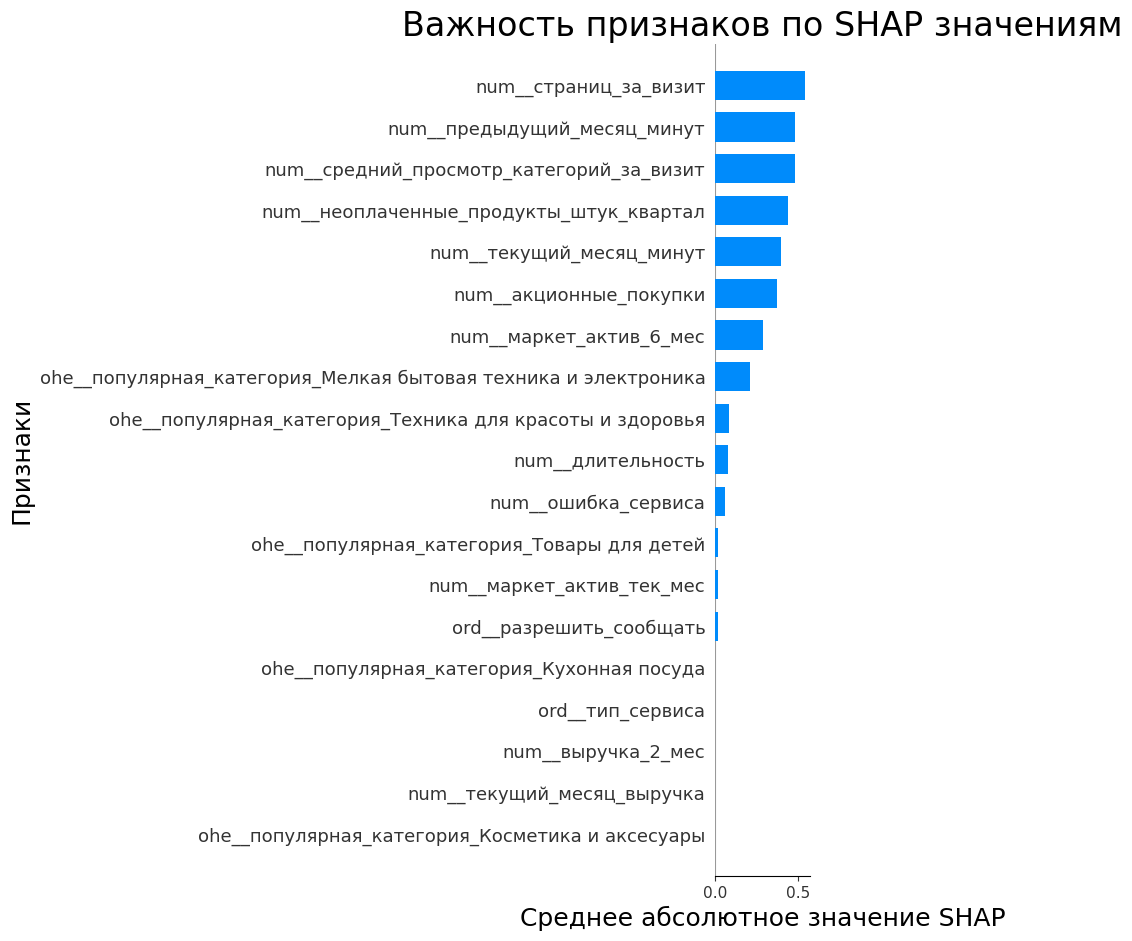

In [165]:
# Инкодируем с помощью пайплайна
X_transformed = grid.best_estimator_['preprocessor'].fit_transform(X_train)

# Обучаем на лучших моделях из грида закодированные данные
model = grid.best_estimator_['models'].fit(X_transformed, y_train)

# Получаем названия признаков
feature_names = grid.best_estimator_['preprocessor'].get_feature_names_out()

# Создаем SHAP объяснитель
explainer = shap.LinearExplainer(model, X_transformed)

# Получаем SHAP значения
shap_values = explainer.shap_values(X_transformed)
plt.figure(figsize=(20, 10))
# Строим bar plot для SHAP значений
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names, plot_type="bar", show=False)

plt.title("Важность признаков по SHAP значениям", fontsize=24)
plt.xlabel("Среднее абсолютное значение SHAP", fontsize=18)
plt.ylabel("Признаки", fontsize=18)
plt.show()

**Вывод:** \
Наиболее важными признаками будут страниц за визит, средний просмотр категорий за визит, предыдущий месяц минут. По всем этим признакам можно попробовать разбить покупателей на сегменты.

##  Сегментация покупателей

### Выполнить сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

In [171]:
print("Порядок классов:", grid.classes_)

Порядок классов: [0 1]


**Целевой признак был строками, и сортировка шла по алфавиту, значит, [1] относится к классу "снизилась"**

In [175]:
# Добавим вероятность отношения покупателя к классу 1
y_pred = grid.predict_proba(X_test)
X_test['вероятность'] = y_pred[:, 1]
data = X_test.sort_values(by='вероятность')
data.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,выручка_2_мес,вероятность
423,стандарт,нет,5.0,4,157,0.15,Мелкая бытовая техника и электроника,5,0,5,13,3372.8,19.0,16.0,8962.0,0.003325
1058,премиум,да,4.8,3,939,0.11,Домашний текстиль,6,1,7,12,4236.6,21.0,23.0,8738.0,0.003377
1272,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11,6102.4,22.0,19.0,10661.5,0.004911
1237,стандарт,да,4.1,5,447,0.14,Косметика и аксесуары,6,0,9,12,5894.6,20.0,17.0,10475.5,0.006853
1201,стандарт,да,6.1,4,298,0.27,Домашний текстиль,6,3,6,16,5149.4,19.0,14.0,10067.5,0.008676


In [178]:
df = data.join(money)

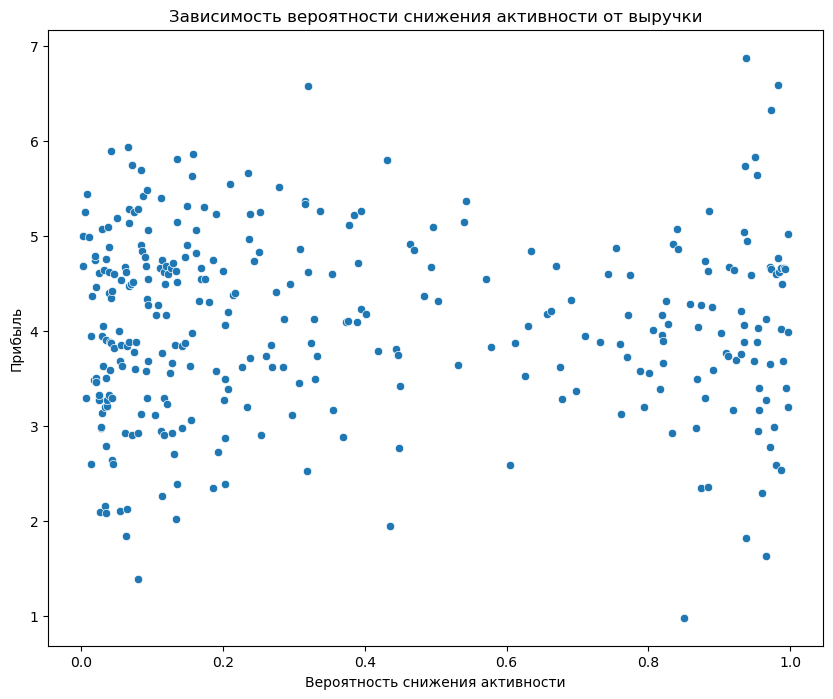

In [180]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Прибыль', x='вероятность')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения активности от выручки')
plt.show()

In [182]:
def build_scatterplots(cat_columns):
    for cat_col in cat_columns:
        fig = plt.figure(figsize=(10,8))
        sns.scatterplot(data=df, y='Прибыль', x='вероятность', hue=cat_col)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title('Зависимость вероятности снижения активности от выручки')
        plt.show()

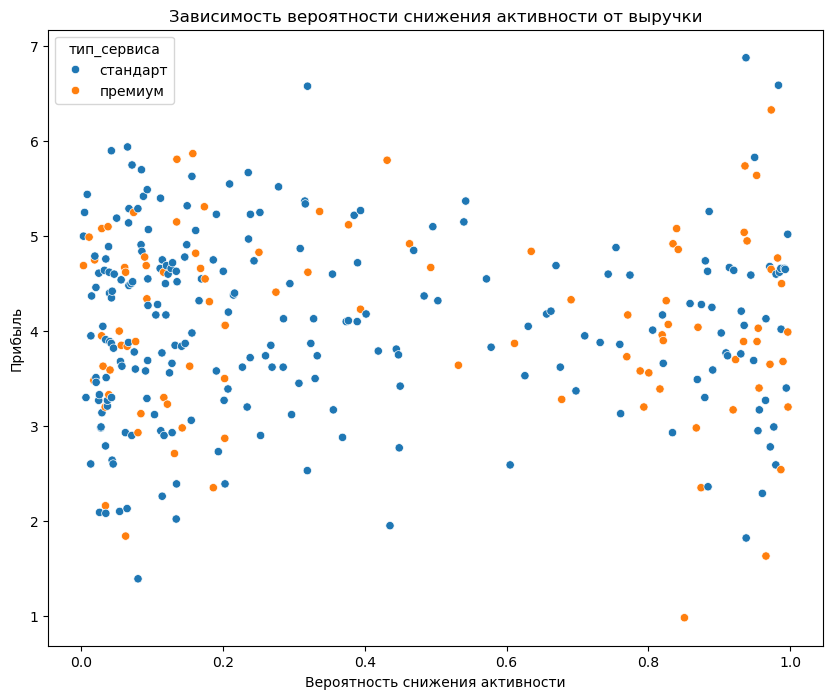

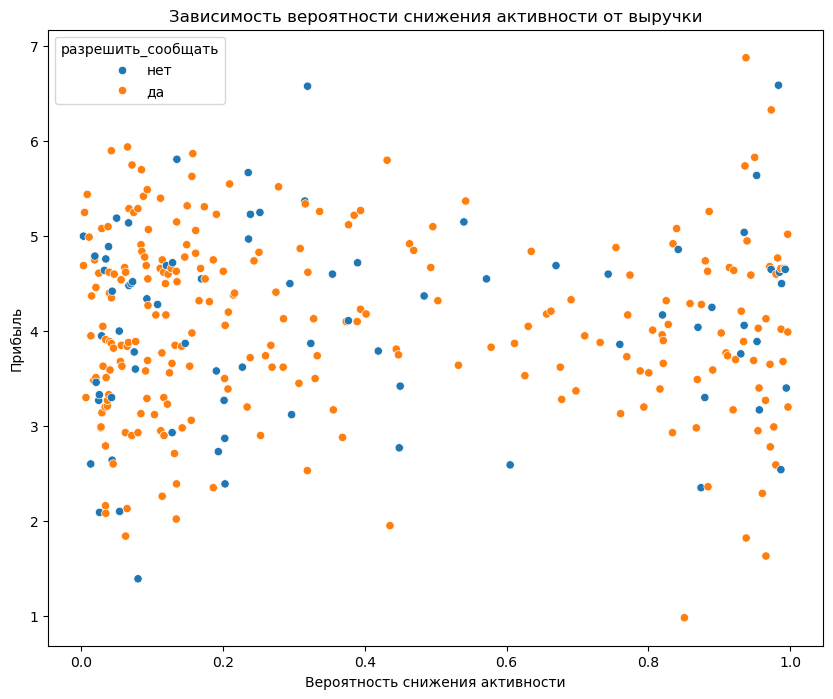

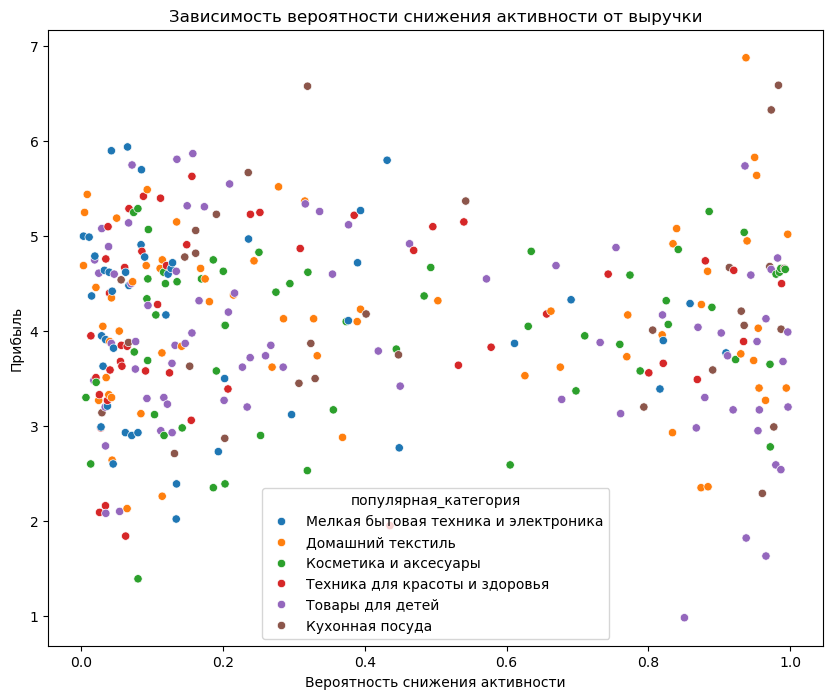

In [184]:
cat_columns = list(df.select_dtypes(include='object').columns)
build_scatterplots(cat_columns)

In [186]:
def histogram(df, col, target):
    plt.figure(figsize=(8,6))
    plot = sns.histplot(df, bins=20, kde=True, hue=target, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)
    
    
def categoral_unique(df, col):
    display(df[col].unique())
    
    plt.figure(figsize=(8,6))
    plot = sns.countplot(y=col, data=df)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

In [188]:
cat_columns = list(df.select_dtypes(include='object').columns)
di_columns = market_di
num_columns = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'текущий_месяц_выручка', 'выручка_2_мес', 'Прибыль']

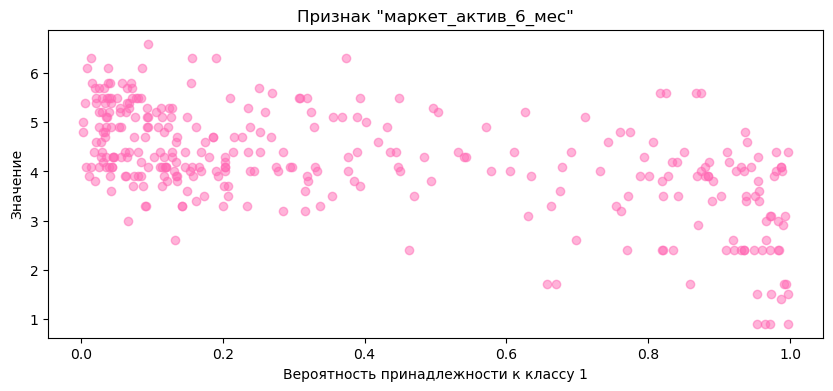

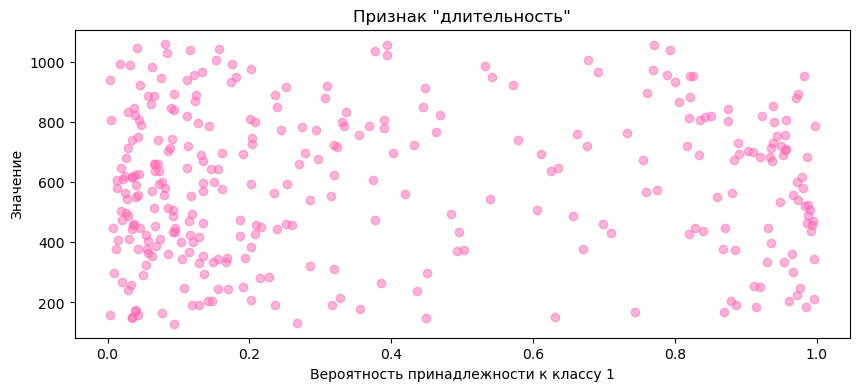

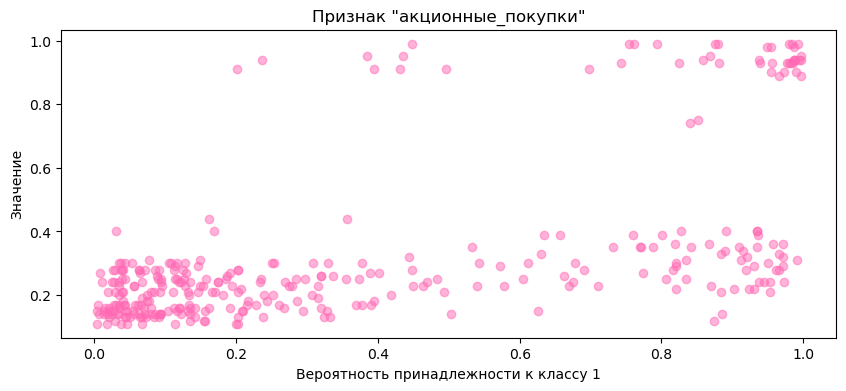

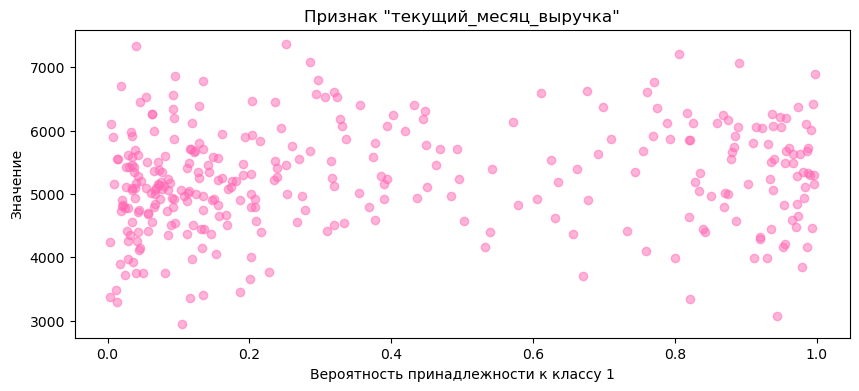

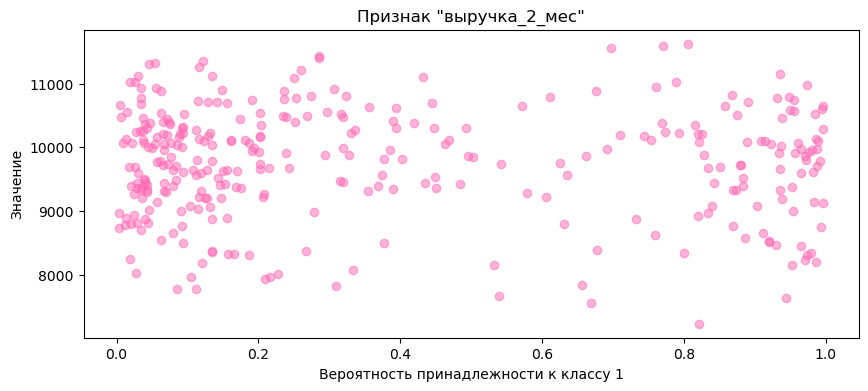

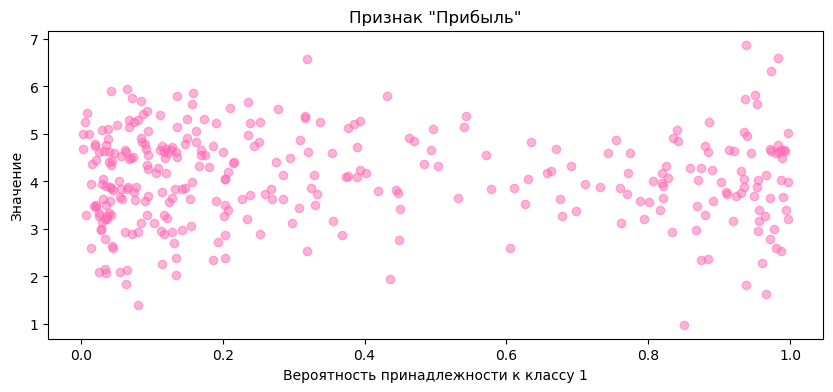

In [190]:
for name in num_columns:
    plt.figure(figsize=(10, 4))
    plt.title(f'Признак "{name}"')
    plt.xlabel('Вероятность принадлежности к классу 1')
    plt.ylabel(f'Значение')
    plt.scatter(x=df['вероятность'], 
                y=df[name],
                alpha=0.5, 
                c='HotPink')

На основании приведенных графиков можно выделить следующие пороги значений признака для разделения покупателей на классы. В частности, покупатели со сниженной активностью имеют значения признака:

* `Маркет_актив_6_мес` менее 3;
* `Акционные покупки` выше 0.6;
* `Средний просмотрт категорий_за_визит` менее 3;
* `неоплачено_штук` более 5;
* `страницы за визит` менее 7;
* `минуты_пред` ниже 14;
* `минуты_тек` ниже 14.

### Выделение сегмента на основе вероятности и прибыли

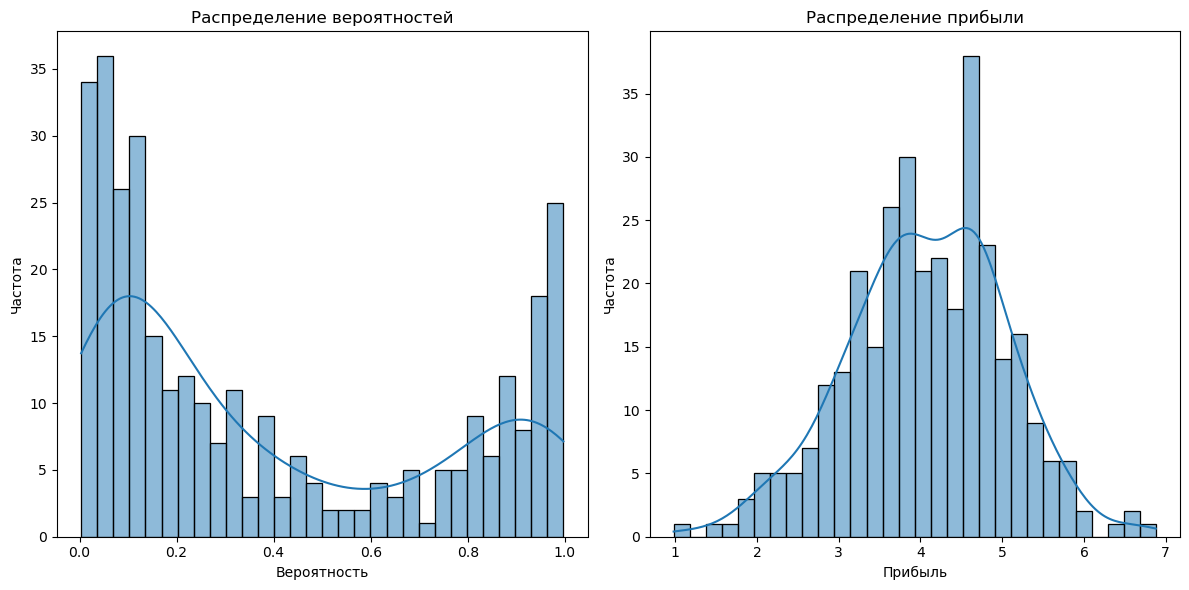

In [194]:
# Исследование распределения
plt.figure(figsize=(12, 6))

# Гистограмма вероятностей
plt.subplot(1, 2, 1)
sns.histplot(df['вероятность'], bins=30, kde=True)
plt.title('Распределение вероятностей')
plt.xlabel('Вероятность')
plt.ylabel('Частота')

# Гистограмма прибыли
plt.subplot(1, 2, 2)
sns.histplot(df['Прибыль'], bins=30, kde=True)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


In [196]:
prob_threshold = df['вероятность'].quantile(0.75)
profit_threshold = df['Прибыль'].quantile(0.75)

In [198]:
segment = df[(df['вероятность'] > prob_threshold) & (df['Прибыль'] > profit_threshold)]
print(segment.shape[0])

15


In [201]:
def categoral_unique(df, col):
    display(df[col].unique())
    
    plt.figure(figsize=(8,6))
    sns.set_palette("Pastel1")
    plot = sns.countplot(y=col, data=df)
    plot.set_title(f'Рапределение {col}', fontsize=16)
    plot.set_xlabel('Количество', fontsize=14)

array(['Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Товары для детей',
       'Кухонная посуда'], dtype=object)

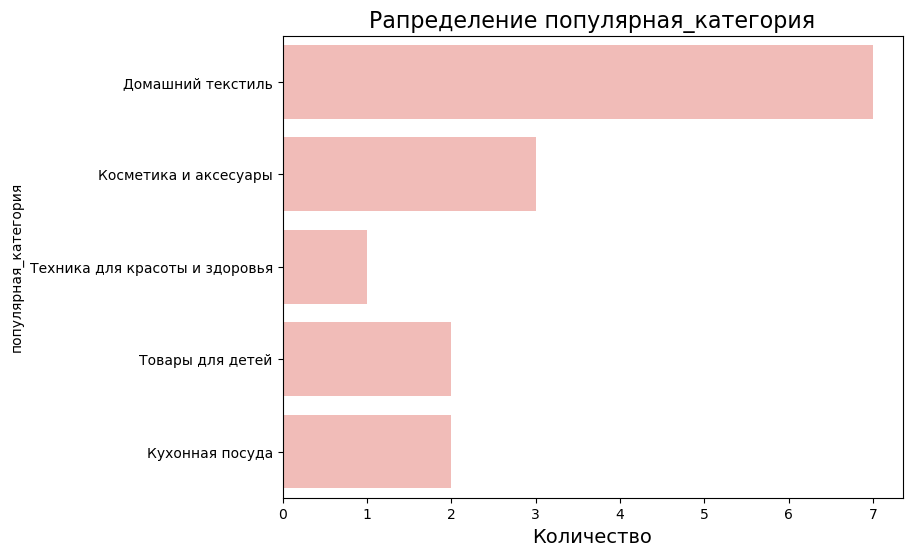

In [203]:
categoral_unique(segment, 'популярная_категория')

array(['премиум', 'стандарт'], dtype=object)

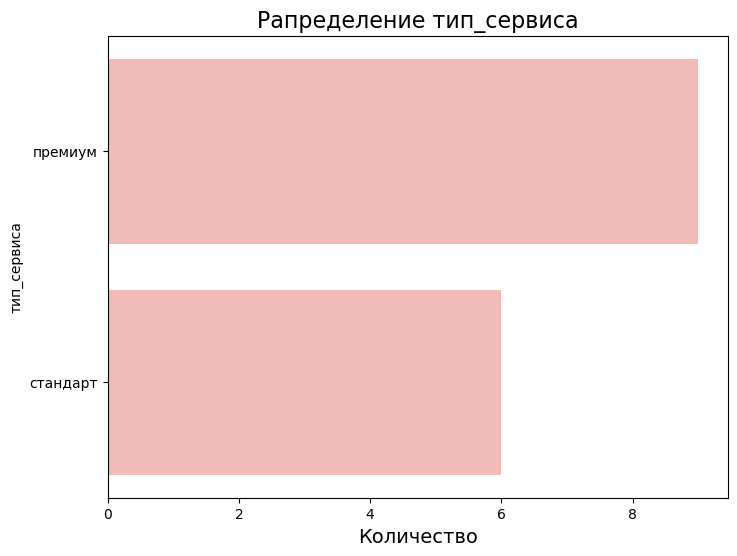

In [205]:
categoral_unique(segment, 'тип_сервиса')

array(['да', 'нет'], dtype=object)

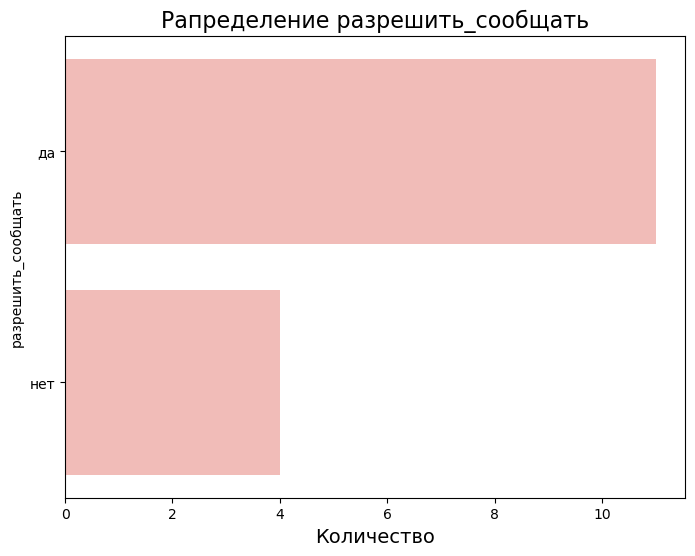

In [207]:
categoral_unique(segment, 'разрешить_сообщать')

In [209]:
neprerivni = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'текущий_месяц_выручка', 'предыдущий_месяц_минут',
  'текущий_месяц_минут', 'выручка_2_мес', ]

In [211]:
def nepr_d(column):
    for i in column:
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(segment[i], bins=30, stat='density', common_norm=False, kde=True)
        plt.xlabel(f'Значения столбца {i}')
        plt.ylabel('Плотность')
        plt.title(f'Гистограмма для {i}')
        plt.tight_layout()
        plt.show()

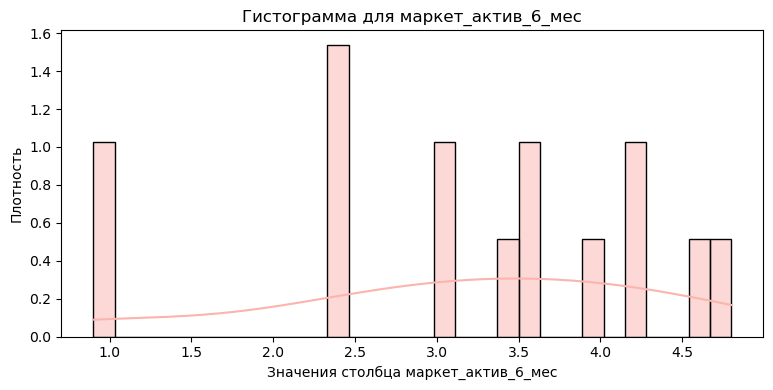

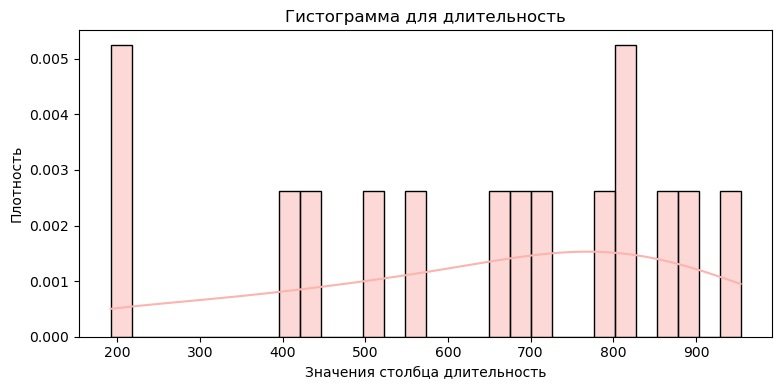

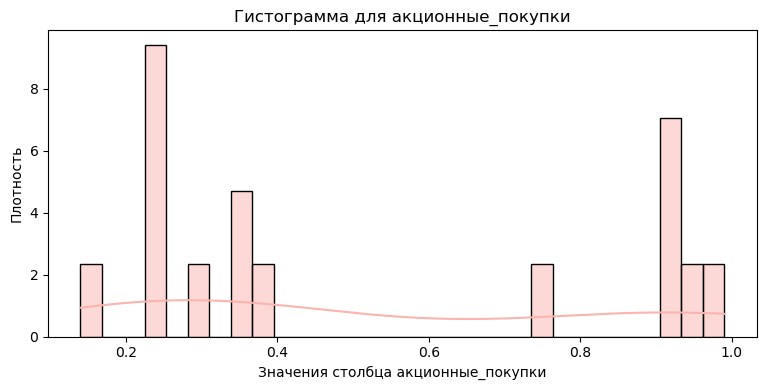

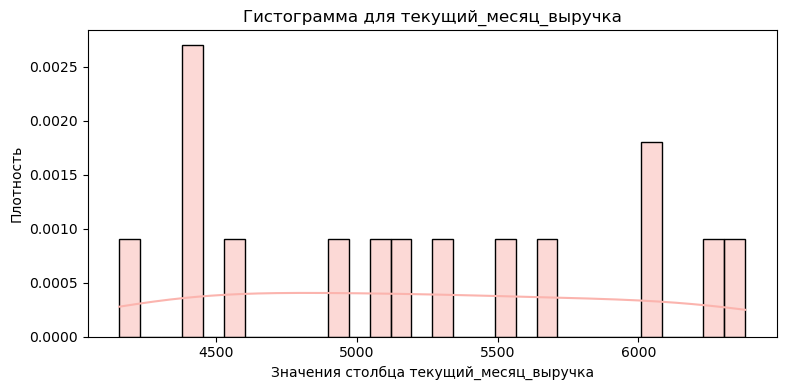

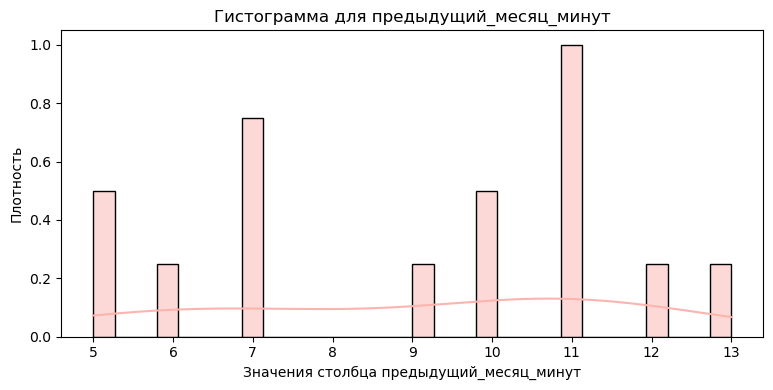

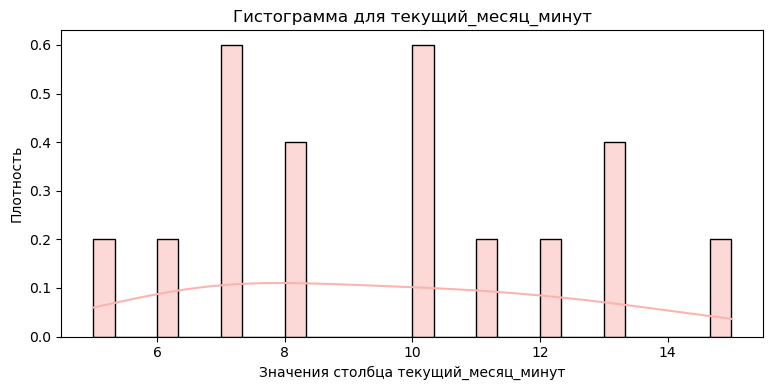

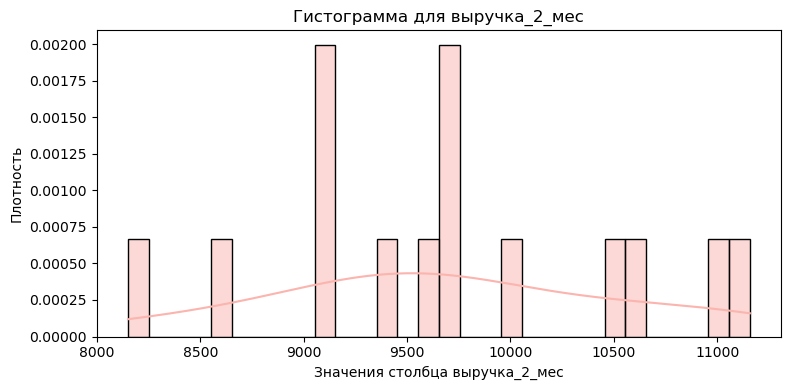

In [213]:
nepr_d(neprerivni)

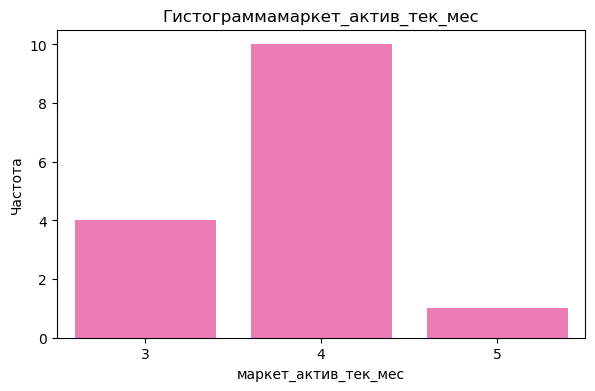

In [214]:
hist_box_di(segment, market_di[0])

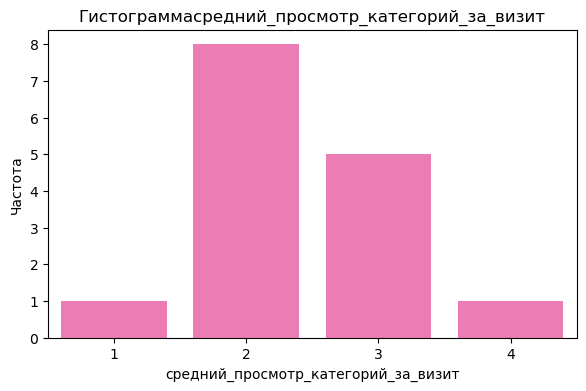

In [217]:
hist_box_di(segment, market_di[1])

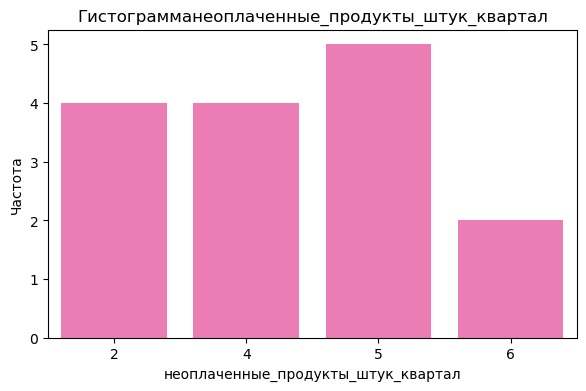

In [219]:
hist_box_di(segment, market_di[2])

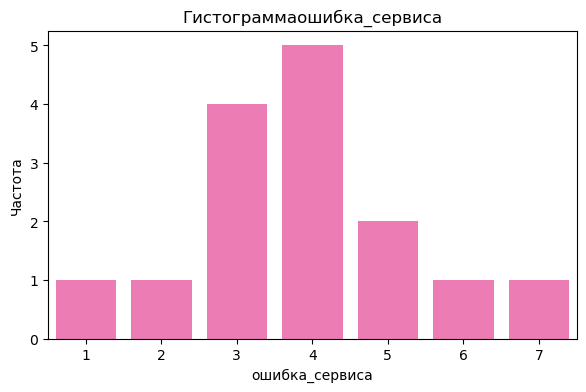

In [221]:
hist_box_di(segment, market_di[3])

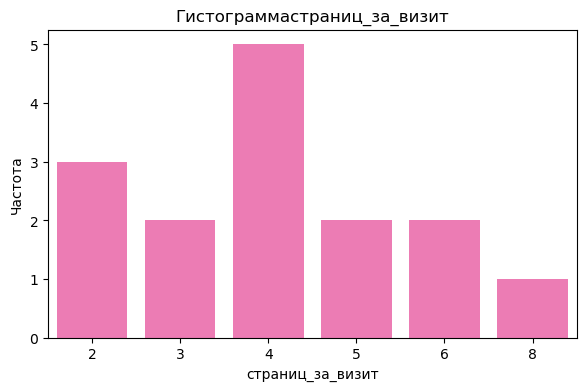

In [223]:
hist_box_di(segment, market_di[4])

**Вывод:**
  * Покупатели, относящиеся к категории **покупаем всё по акции** и демонстрирующие снижение покупательской активности, в основном приобретают товары для детей. 
  * Они почти не рассматривают другие категории при посещении сайта, просматривают меньше страниц и проводят на платформе меньше времени по сравнению с теми покупателями, чья активность осталась неизменной.

## Общий вывод

В рамках исследования были проделаны следующие шаги.

1. Загрузка данных
Исходными данными для исследования были четыре отдельных csv файла:

* с данными о поведении покупателя на сайте, коммуникации с ним и его продуктовом поведении.
* с данными о выручке, которую получает магазин с покупателя за период
* с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода
* данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю Данные были загружены в датафреймы библиотеки pandas.

2. Предобработка данных
Исходные данные оказались хорошего качества, но тем не менее они требовали проведения некоторых работ перед началом анализа. 
* Во-первых приведение типов данных. 
* Во-вторых обработка неявных дубликатов.
* Пропусков в данных не нашлось

3. Исследовательский анализ данных
На этом этапе были построены диаграммы распределения всех признаков. С помощью графиков были обнаружены и исправлены опечатки в категоральных признаках. Акционные_покупки (т.е. если данные близки к 1, то 100 проц покупок по акции) Распределено на два участка. Имеет бимодальное распределение. Тут же было выделен выброс в категории Выручка и удален.
4. Корреляционный анализ данных
Целевым признаком является Покупательская_активность и следующие признаки, которые имеют хоть корреляцию с ним: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц.
Так же график показал сильную зависимость между целевым признаком и id так что в дальнейшем при подготовке данных к обучению модели признак идентификатор был удален. 

5. Объеденение таблиц
Датасеты market_file, market_money, market_time были объеденены в один датафрейм.

6. Обучение модели
С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). 
По результатам обучения лучшей стала модель LogisticRegressionC=1, penalty='l1', random_state=42,solver='liblinear'))])
Метрика лучшей модели на тренировочной выборке: 0.8982943861216588 для тестовой 0.89. 

7. Анализ важности признаков
Наиболее важными признаками будут страниц за визит, средний просмотр категорий за визит, предыдущий месяц минут. По всем этим признакам можно попробовать разбить покупателей на сегменты.

8. Сегментация пользователей
 * Покупатели, относящиеся к категории **Товары для детей** и демонстрирующие снижение покупательской активности, в основном приобретают товары по акциям. 
  * Они почти не рассматривают другие категории при посещении сайта, просматривают меньше страниц и проводят на платформе меньше времени по сравнению с теми покупателями, чья активность осталась неизменной.

Что касается месячной выручки, то два месяца назад доход от покупателей с низкой активностью был ниже, чем от тех, кто сохранял прежний уровень активности. Однако в прошлом и текущем месяце выручка у них примерно одинаковая, как и прибыль.

Возможно, стоит организовать акции на детские товары и разместить их на первых страницах сайта, чтобы привлечь внимание этих покупателей.